# Entry 12 notebook - Missing Values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

from sklearn.datasets import fetch_openml
import missingno
from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
raw_df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00424/2014%20and%202015%20CSM%20dataset.xlsx')
raw_df.head()

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 14 columns):
Movie                  231 non-null object
Year                   231 non-null int64
Ratings                231 non-null float64
Genre                  231 non-null int64
Gross                  231 non-null int64
Budget                 230 non-null float64
Screens                221 non-null float64
Sequel                 231 non-null int64
Sentiment              231 non-null int64
Views                  231 non-null int64
Likes                  231 non-null int64
Dislikes               231 non-null int64
Comments               231 non-null int64
Aggregate Followers    196 non-null float64
dtypes: float64(4), int64(9), object(1)
memory usage: 25.4+ KB


### Columns with missing data

There are three columns with missing data:

- Budget: 1 missing
- Screens: 10 missing
- Aggregate Followers: 35 missing

### Missingness visualization

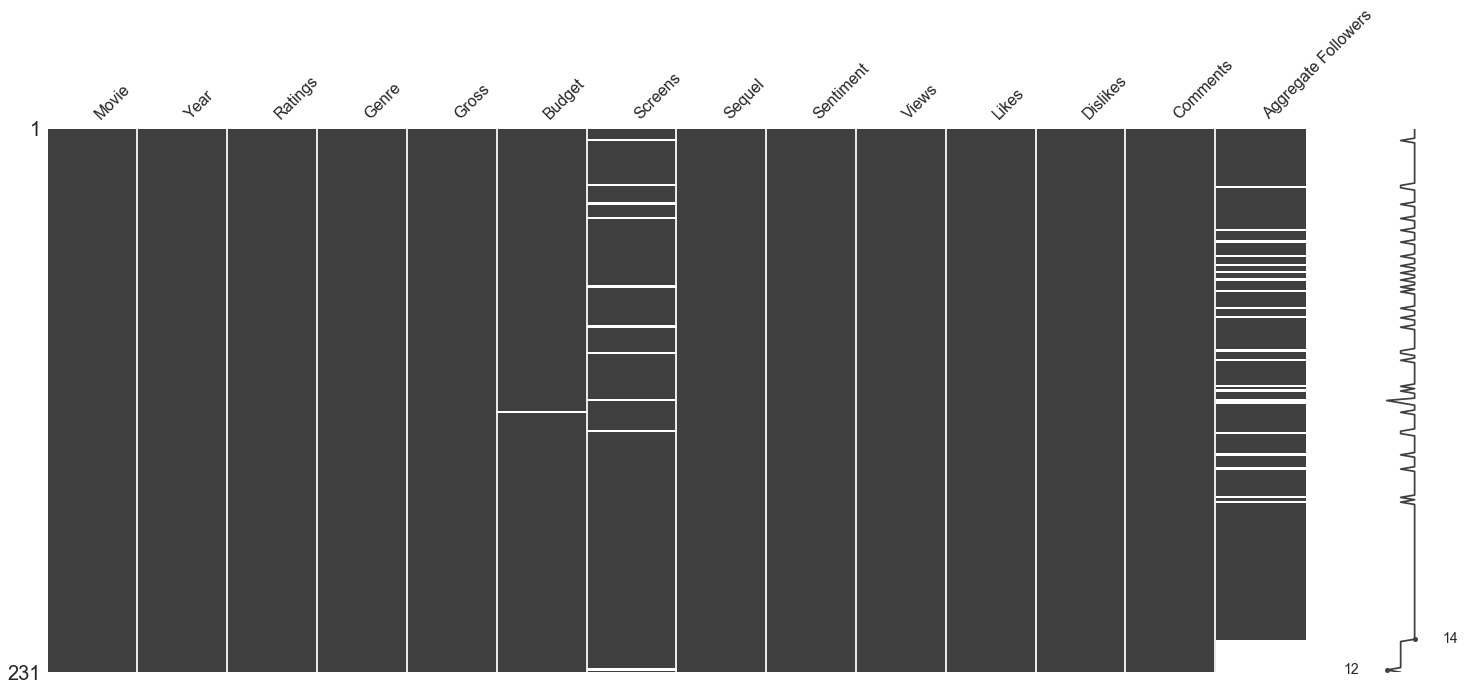

In [4]:
missingno.matrix(raw_df)

### Budget

In [5]:
raw_df[raw_df['Budget'].isna()]

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
120,The Fluffy Movie: Unity Through Laughter,2014,7.0,8,2820000,NaN,432.0,1,0,10747,4,1,1,818000.0


In [6]:
raw_df.Budget.describe()

count    2.300000e+02
mean     4.792173e+07
std      5.428825e+07
min      7.000000e+04
25%      9.000000e+06
50%      2.800000e+07
75%      6.500000e+07
max      2.500000e+08
Name: Budget, dtype: float64

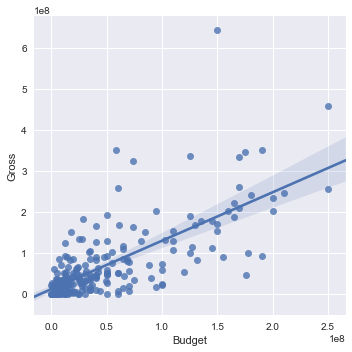

In [7]:
sns.lmplot('Budget', 'Gross', data = raw_df)

#### Budget missingness decision

There is only 1 row missing a value for Budget. The range (70,000 - 250,000,000) and standard deviation (54,288,250) for Budget are pretty wide, so a straight median or mean would just be a shot in the dark.

I considered trying to impute it based on Gross. This may get me closer to the truth than a mean/median imputation, but the line of best fit doesn't really inspire a lot of confidence in it's predictive power. 

Since it's only one row, I'm just going to drop it.

In [8]:
raw_df.dropna(subset=['Budget'], inplace=True)

### Aggregate Followers

In [9]:
raw_df[raw_df['Aggregate Followers'].isna()]

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
25,Cantinflas,2014,6.7,9,6370000,3.000000e+06,382.0,1,3,2902492,9522,558,2296,NaN
43,God's Pocket,2014,6.1,10,104000,1.000000e+06,3.0,1,0,99427,47,10,12,NaN
48,Heaven Is for Real,2014,5.8,3,91400000,1.200000e+07,2417.0,1,-9,175017,461,34,133,NaN
54,Inherent Vice,2014,6.7,8,8090000,2.000000e+07,645.0,1,1,1167941,2651,82,797,NaN
58,It Follows,2014,6.9,15,14700000,2.000000e+06,4.0,1,-9,4877,6,1,1,NaN
61,John Wick,2014,7.2,1,43000000,2.000000e+07,2589.0,1,0,4846645,14722,405,2732,NaN
64,Kung Fu Jungle,2014,6.5,1,129000,2.500000e+07,28.0,1,-2,289922,143,17,9,NaN
69,Lucy,2014,6.4,1,127000000,4.000000e+07,3173.0,1,1,1142964,2346,167,311,NaN
76,My Old Lady,2014,6.3,8,4010000,5.000000e+06,255.0,1,0,446576,659,50,45,NaN
80,Nightcrawler,2014,7.9,10,32300000,8.500000e+06,2766.0,1,-1,6082510,12522,543,2170,NaN


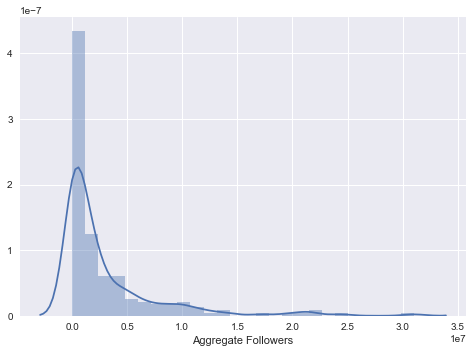

In [10]:
sns.distplot(raw_df['Aggregate Followers'].dropna())

#### Aggregate Followers missingness decision

Missing values occur in both 2014 and 2015. No other patterns stand out (variety of genres, sequel numbers, sentiment ratings, etc).

Distribution is highly right skewed, so I'm just going to use the most frequent value to fill in the missing values.

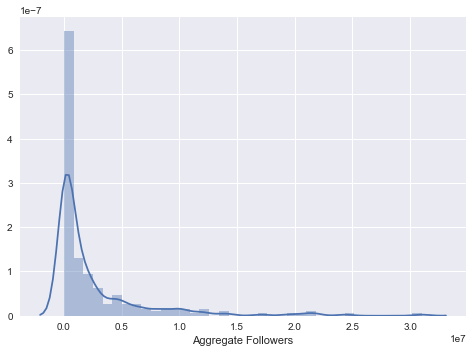

In [11]:
median_imp = SimpleImputer(strategy='most_frequent')
raw_df['Aggregate Followers'] = median_imp.fit_transform(raw_df[['Aggregate Followers']]).ravel()
sns.distplot(raw_df['Aggregate Followers'])

### Screens

In [12]:
raw_df[raw_df['Screens'].isna()]

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
5,A Long Way Off,2014,4.6,3,29000,500000.0,NaN,1,0,91137,112,7,1,310000.0
24,Camp X-Ray,2014,7.0,3,9840,1000000.0,NaN,1,3,7128,1,0,0,2182.0
32,Dracula Untold,2014,6.3,1,55900000,70000000.0,NaN,1,0,9149892,26427,1342,5278,395500.0
38,Falcon Rising,2014,5.7,1,8690,4500000.0,NaN,1,0,735551,636,98,92,1060000.0
67,Life After Beth,2014,5.7,8,8300,2400000.0,NaN,1,0,1222921,5553,193,335,1463000.0
84,Not Cool,2014,5.2,8,35700,600000.0,NaN,1,0,5403836,187162,3145,24919,2720000.0
95,Rudderless,2014,7.5,8,37400,5000000.0,NaN,1,0,827239,3221,89,432,217000.0
115,The Devil's Hand,2014,4.8,7,4240,7000000.0,NaN,1,0,330363,406,52,92,130000.0
128,The Identical,2014,5.0,3,2820000,12000000.0,NaN,1,0,309610,729,97,113,275873.0
229,War Room,2015,5.4,1,12300000,3000000.0,NaN,1,10,66872,400,67,201,130000.0


In [13]:
raw_df.Screens.describe()

count     220.000000
mean     2217.322727
std      1462.159806
min         2.000000
25%       458.000000
50%      2777.500000
75%      3373.000000
max      4324.000000
Name: Screens, dtype: float64

In [14]:
raw_df.Sequel.value_counts()

1    187
2     25
3      8
5      4
4      3
7      2
6      1
Name: Sequel, dtype: int64

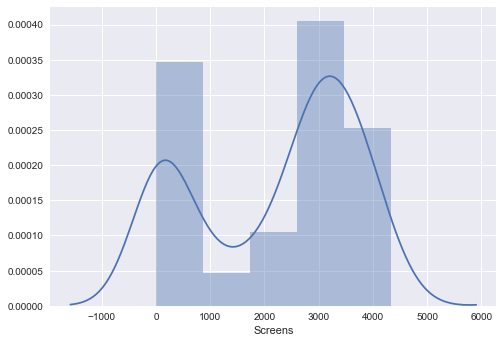

In [15]:
sns.distplot(raw_df['Screens'].dropna())

#### Screens missingness decision

All but one of the observations with a missing screen value occurred in 2014. All of them are Sequel = 1, but most of the movies in the list are. No other obvious patterns of missingness are evident.

There is a bimodal distribution, which probably has something to do with 'blockbuster' movies vs the more normal releases. If I use an average value (mean or median) this will lower the bimodal characterists. Using the most frequent value will make one of the bimodal humps more prominent.

I'm going to try the Scikit Learn IterativeImputer. It's listed as experimental, but at this point, it couldn't do any more harm than the other imputation methods.

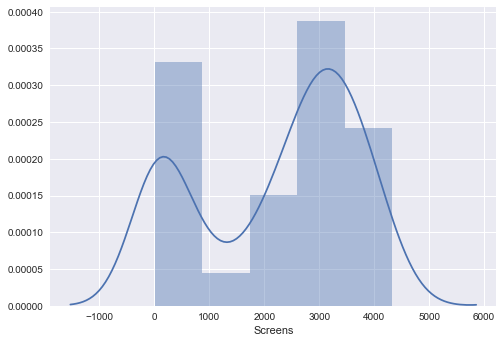

In [16]:
iter_imp = IterativeImputer(random_state=12, initial_strategy='mean')
raw_df['Screens'] = iter_imp.fit_transform(raw_df[['Screens']]).ravel()
sns.distplot(raw_df['Screens'])

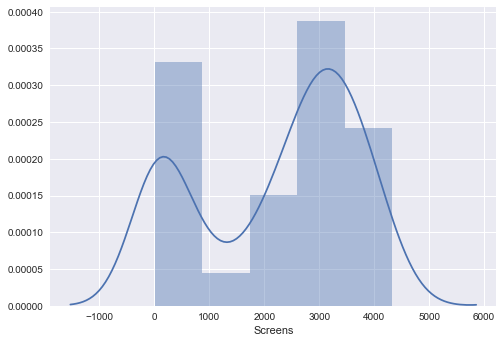

In [17]:
iter_imp = IterativeImputer(random_state=12, initial_strategy='median')
raw_df['Screens'] = iter_imp.fit_transform(raw_df[['Screens']]).ravel()
sns.distplot(raw_df['Screens'])

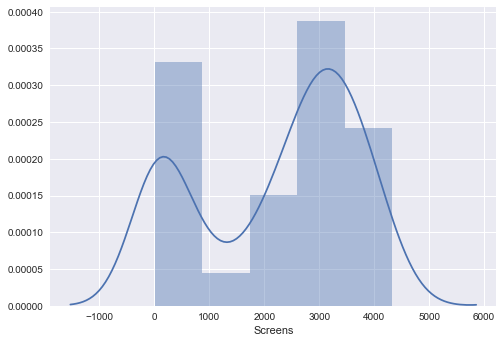

In [18]:
iter_imp = IterativeImputer(random_state=12, initial_strategy='most_frequent')
raw_df['Screens'] = iter_imp.fit_transform(raw_df[['Screens']]).ravel()
sns.distplot(raw_df['Screens'])

#### Findings

From the distribution plot, it appears the Iterative Imputer returned the same results for all three initial strategies. It also looks like it just used an average value. This may have something to do with the fact that I only included the single column, so it probably couldn't see the rest of the data to make a decision. However, when I used the IterativeImputer on the whole dataset (after the transformations to Budget and Aggregate Followers) I get the same results again.

In [19]:
trial_df = raw_df.copy().set_index('Movie')
trial_df.head()

,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
Movie,,,,,,,,,,,,,
13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0


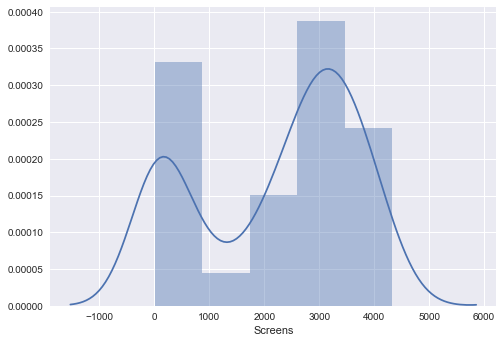

In [20]:
trial_df = iter_imp.fit_transform(trial_df)
sns.distplot(raw_df['Screens'])

In [21]:
data = fetch_openml(name='Titanic', version=1, as_frame=True)
titanic = pd.DataFrame(data['data'])
titanic.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
pclass       1309 non-null float64
name         1309 non-null object
sex          1309 non-null category
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null category
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: category(2), float64(6), object(5)
memory usage: 115.4+ KB


In [23]:
thresh = int(titanic.shape[0] * 0.6)
print('Remove columns with at least', thresh, 'missing values')
print('This means a column must have at least', titanic.shape[0] - thresh, 'values')

Remove columns with at least 785 missing values
This means a column must have at least 524 values


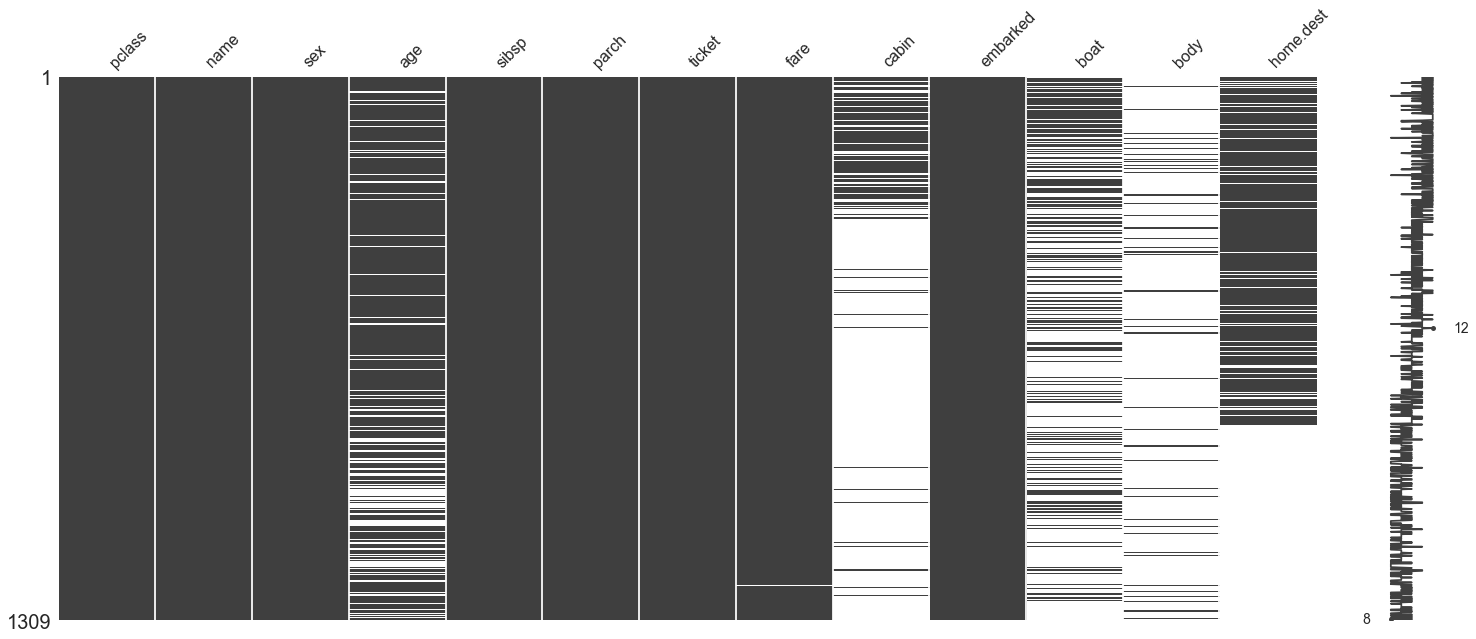

In [24]:
missingno.matrix(titanic)

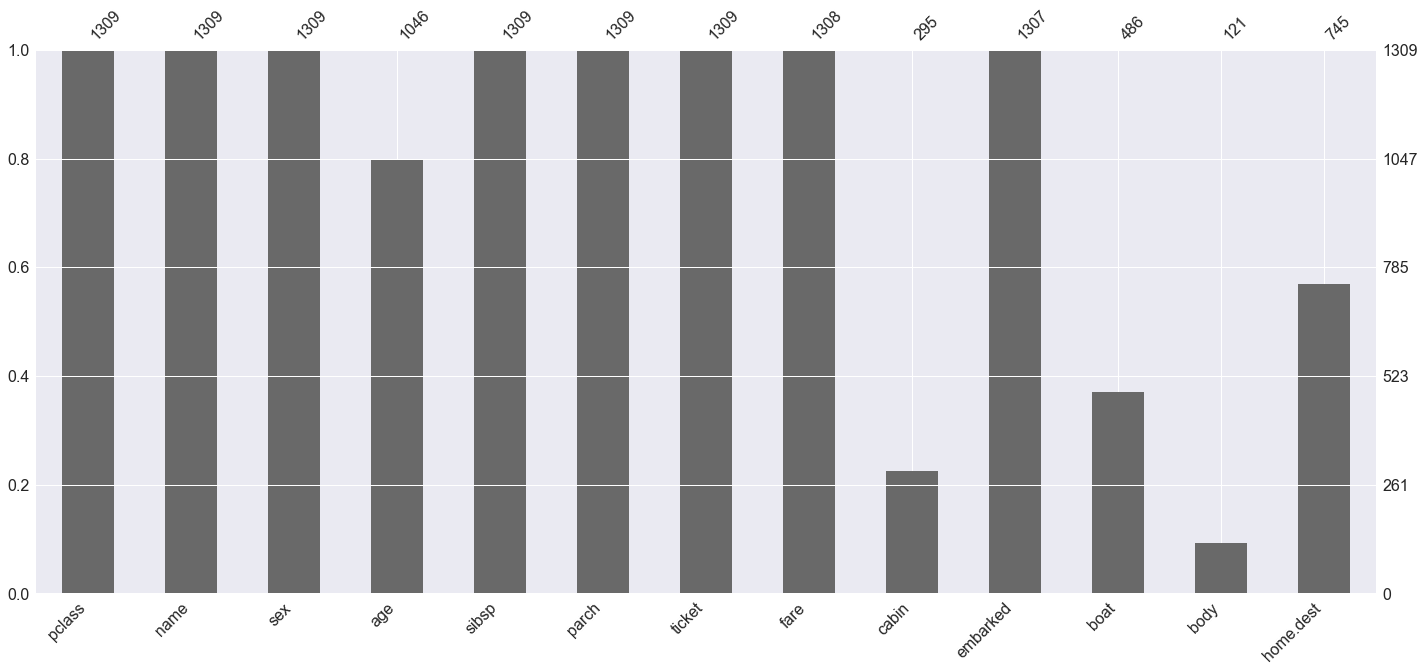

In [25]:
missingno.bar(titanic)

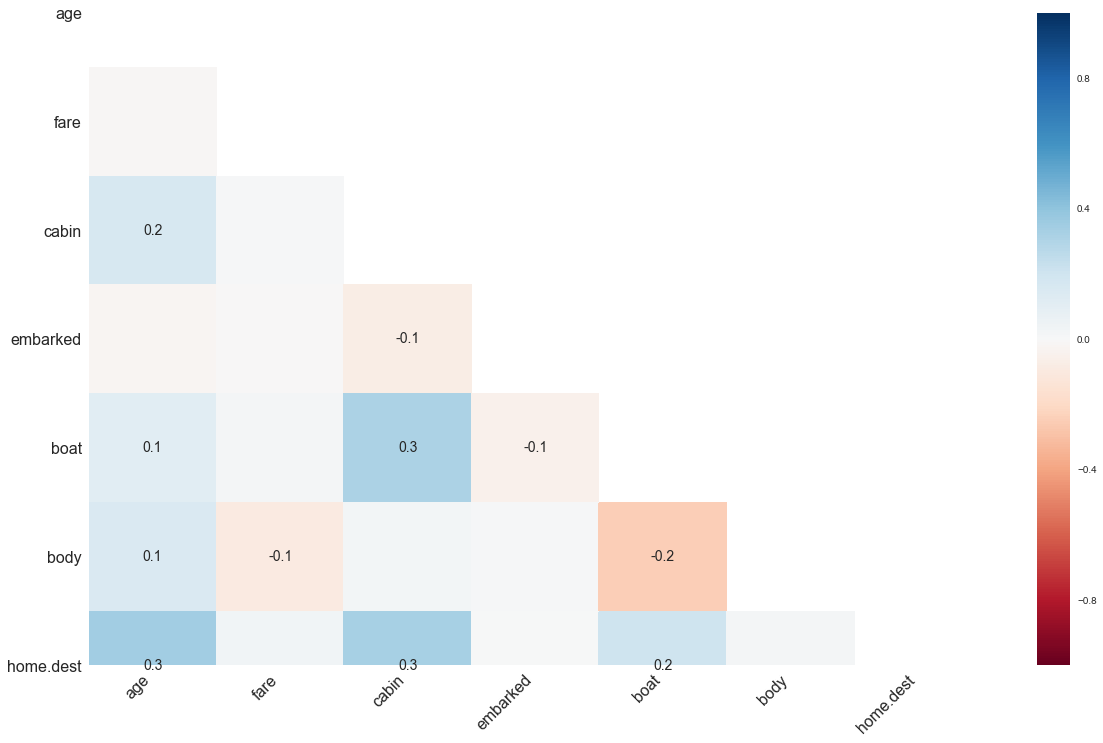

In [26]:
missingno.heatmap(titanic)

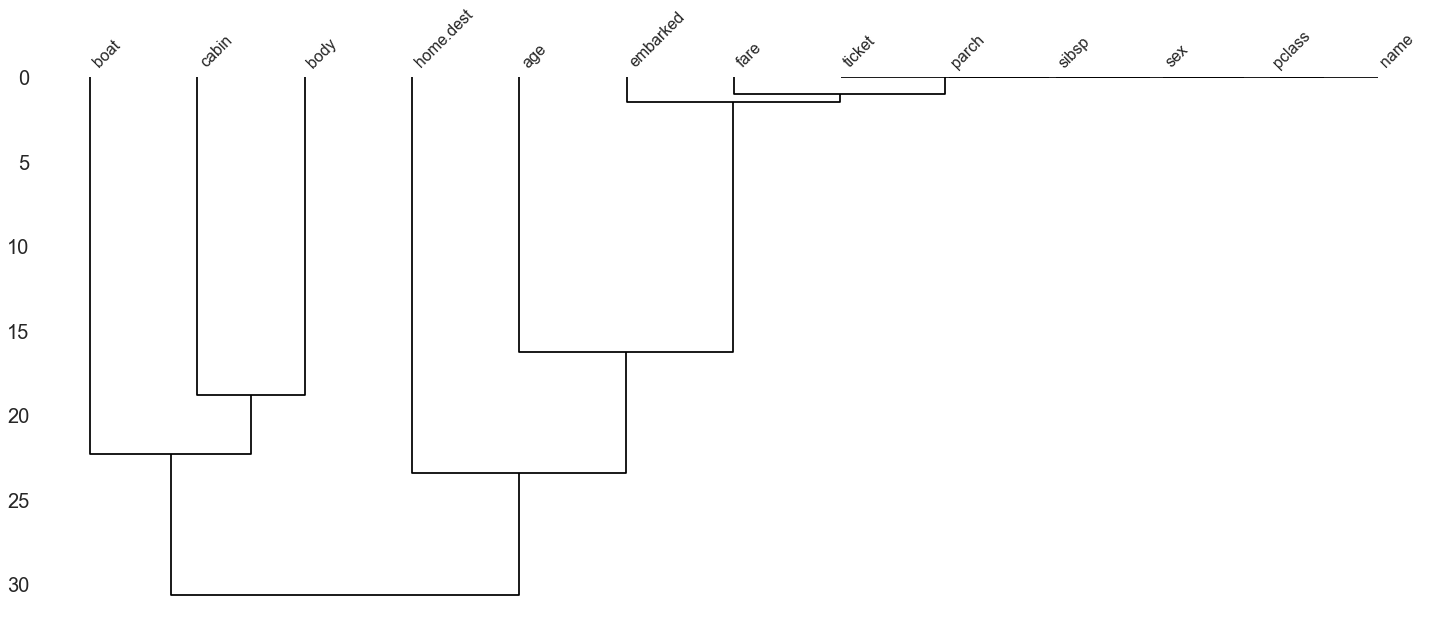

In [27]:
missingno.dendrogram(titanic)